In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/Social_Network_Ads.csv')
df

User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]

In [4]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [5]:
x=df[['Age','EstimatedSalary']]
y= df['Purchased']

In [6]:
x

Age  EstimatedSalary
0    19.0          19000.0
1    35.0          20000.0
2    26.0          43000.0
3    27.0          57000.0
4    19.0          76000.0
..    ...              ...
395  46.0          41000.0
396  51.0          23000.0
397  50.0          20000.0
398  36.0          33000.0
399  49.0          36000.0

[400 rows x 2 columns]

In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
x.shape, y.shape

((400, 2), (400,))

In [9]:
x.describe()

Age  EstimatedSalary
count  400.000000       400.000000
mean    37.655000     69742.500000
std     10.482877     34096.960282
min     18.000000     15000.000000
25%     29.750000     43000.000000
50%     37.000000     70000.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000

In [10]:
set(y)

{0, 1}

<Axes: xlabel='Purchased', ylabel='count'>

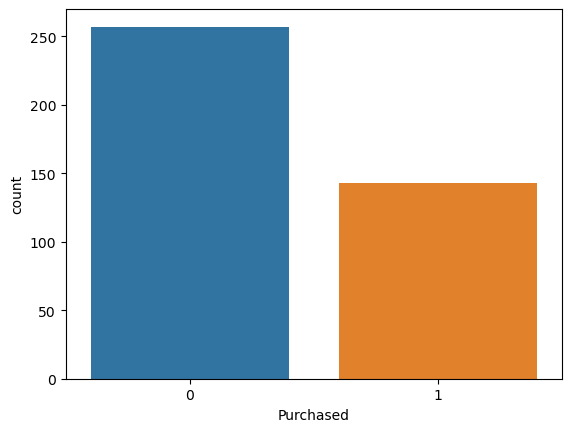

In [11]:
sns.countplot(x=y)

In [12]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

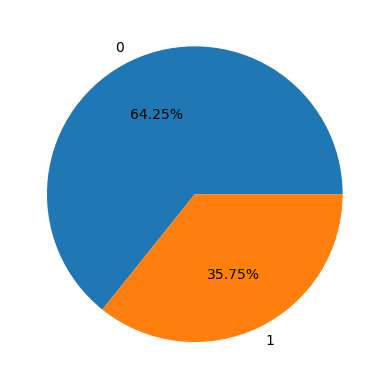

In [13]:
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%2.2f%%');

In [14]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

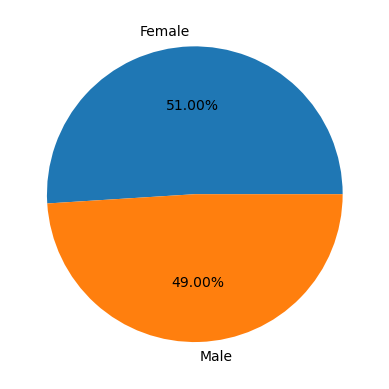

In [15]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index,autopct='%2.2f%%');

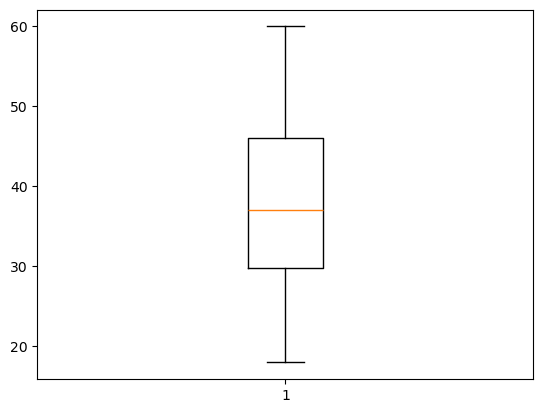

In [16]:
plt.boxplot(df['Age']);

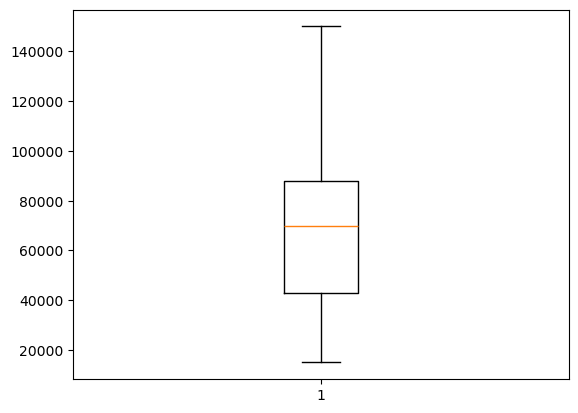

In [17]:
plt.boxplot(df['EstimatedSalary']);

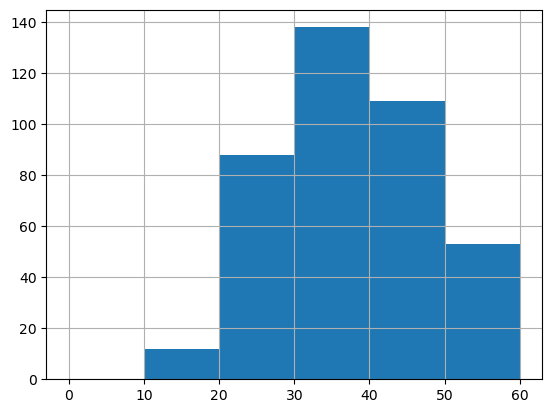

In [18]:
plt.grid()
plt.xticks(range(0,61,10))
plt.hist(df['Age'],range(0,61,10));

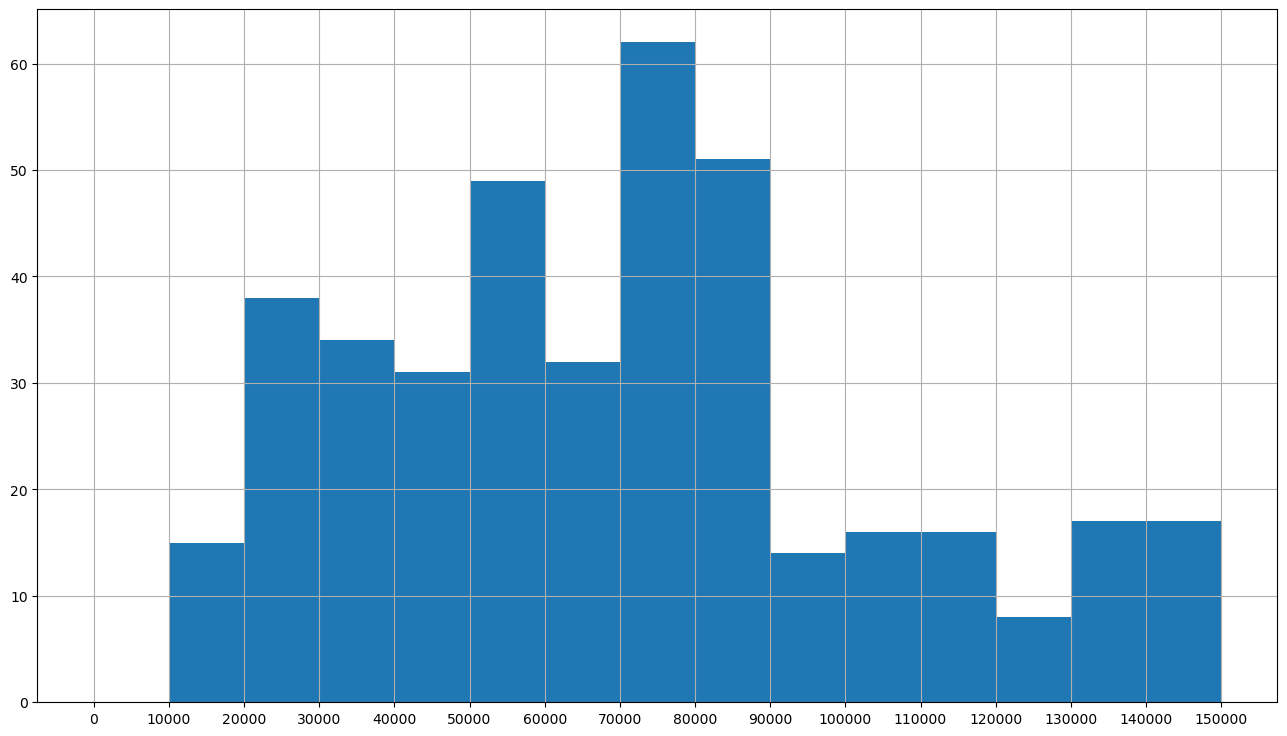

In [19]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xticks(range(0,150001,10000))
plt.hist(df['EstimatedSalary'],range(0,150001,10000));

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


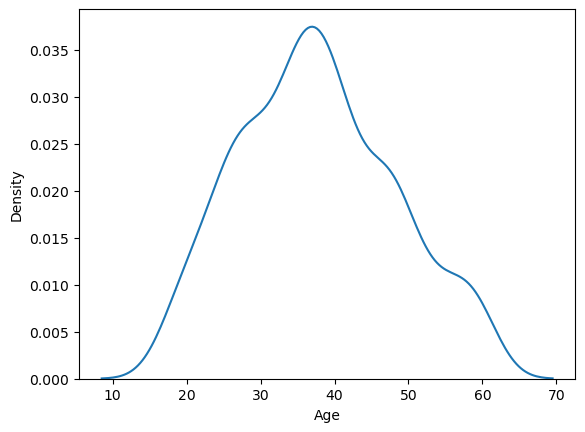

In [20]:
sns.kdeplot(df['Age']);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


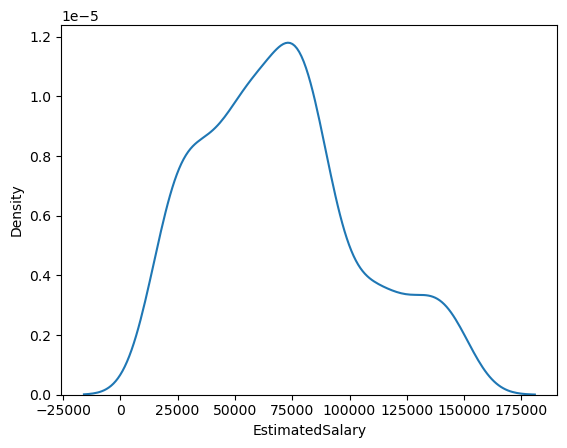

In [21]:
sns.kdeplot(df['EstimatedSalary']);

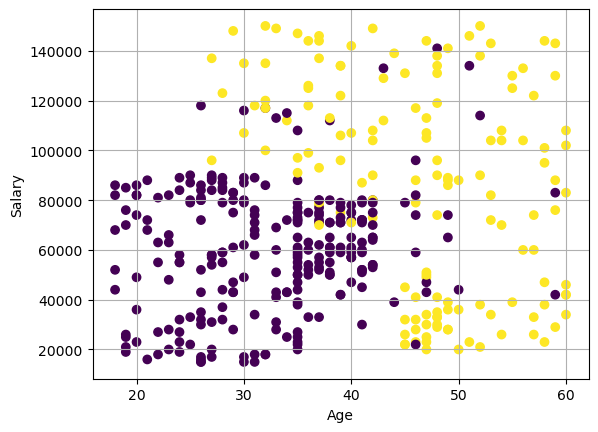

In [22]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'],x['EstimatedSalary'], c=y)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


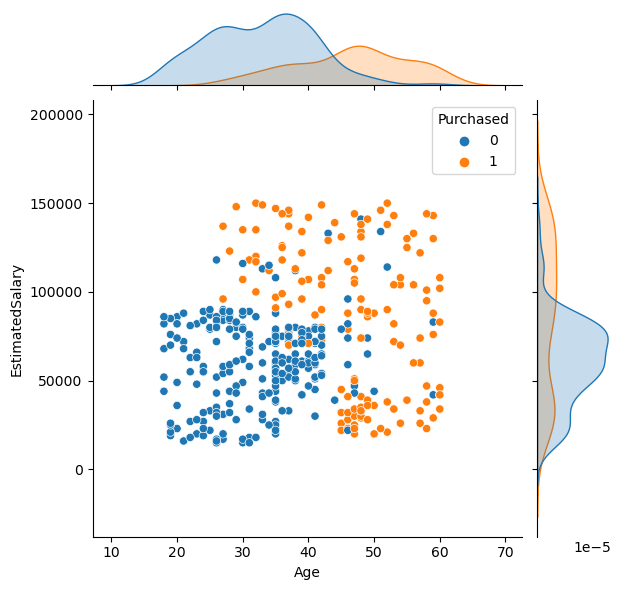

In [23]:
sns.jointplot(x='Age',y='EstimatedSalary', data=df, hue='Purchased');

In [24]:
#import the class
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler() # create object
x_scaled = scaler.fit_transform(x)    # apply the scaling

In [25]:
pd.DataFrame(x_scaled).describe()

0           1
count  400.000000  400.000000
mean     0.467976    0.405500
std      0.249592    0.252570
min      0.000000    0.000000
25%      0.279762    0.207407
50%      0.452381    0.407407
75%      0.666667    0.540741
max      1.000000    1.000000

In [26]:
# Cross Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x_scaled,y,random_state=0)

In [27]:
x_train.shape

(300, 2)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [29]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [30]:
classifier.score(x_train,y_train)

0.8033333333333333

In [31]:
# Predict on Unseen data
y_pred=classifier.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
result=pd.DataFrame({
    'actual': y_test,
    'Predicted':y_pred
})
result

actual  Predicted
132       0          0
309       0          0
341       0          0
196       0          0
246       0          0
..      ...        ...
146       1          0
135       0          0
390       1          0
264       1          1
364       1          1

[100 rows x 2 columns]

In [34]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

#### Performance Evaluation

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [36]:
print(confusion_matrix(y_test,y_pred))

[[67  1]
 [10 22]]


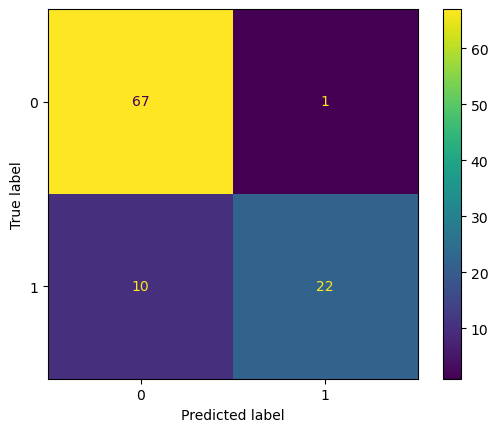

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [38]:
accuracy_score(y_test,y_pred)

0.89

In [39]:
cm=confusion_matrix(y_test,y_pred)

In [40]:
cm.diagonal().sum()/cm.sum()

0.89

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [42]:
#Accuracy of call 0/ recall/ sensitivity of algorithm
r0=67/68
r0

0.9852941176470589

In [43]:
# recall 1/ Accuracy of class 1/ Specificity of algorithm
r1=22/32
r1

0.6875

In [44]:
#precision of class 0 /+ve Predictive value
p0=67/77
p0

0.8701298701298701

In [45]:
#precision of class 1 /-ve Predictive value
p1=22/23
p1

0.9565217391304348

In [46]:
#f1 score of Class 0
2*p0*r0/(p0+r0)

0.9241379310344828

In [47]:
#f1 score of Class 1
2*p1*r1/(p1+r1)

0.8

In [48]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

#### Prediction of Unseen Data

In [49]:
new=np.array([[23,45000],[54,148000],[37,63000]])
new

array([[    23,  45000],
       [    54, 148000],
       [    37,  63000]])

In [50]:
new_scaler = scaler.transform(new) 
new_scaler

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11904762, 0.22222222],
       [0.85714286, 0.98518519],
       [0.45238095, 0.35555556]])

In [51]:
classifier.predict(new_scaler)

array([0, 1, 0], dtype=int64)

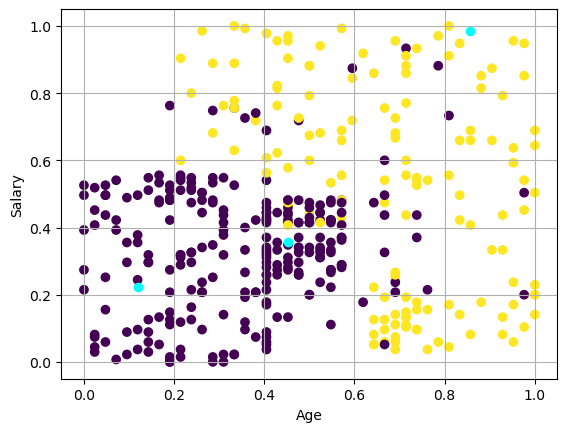

In [52]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x_scaled[:,0],x_scaled[:,1], c=y)
plt.scatter(new_scaler[:,0],new_scaler[:,1], color='cyan')

In [53]:
classifier.predict_proba(new_scaler)

array([[0.94995459, 0.05004541],
       [0.06890179, 0.93109821],
       [0.72598556, 0.27401444]])

#### ROC & AUC 

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
#Predict Probabilities
y_prob= classifier.predict_proba(x_test)[:,1]

In [58]:
# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc= roc_auc_score(y_test,y_prob)

In [59]:
roc_auc

0.9545036764705882

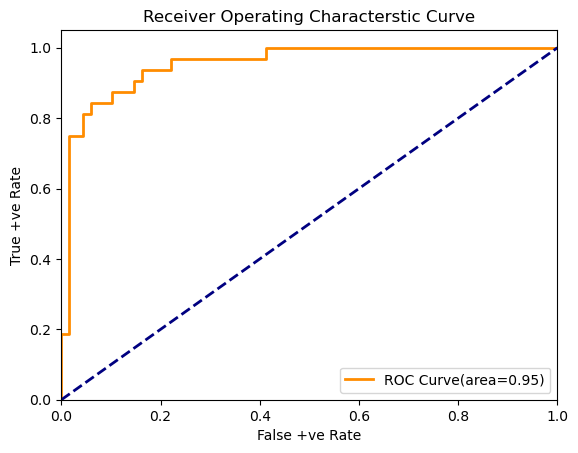

In [61]:
#Performance Probability based model
#Plot ROC Curve
plt.plot(fpr,tpr, color='darkorange',lw=2, label=f'ROC Curve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')